In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('2015_Air_quality_in_northern_Taiwan_new.csv')
data.fillna(0,inplace=True)
data.head()

,time,station,AMB_TEMP,CH4,CO,NMHC,NO,NO2,Nox,O3,...,RAINFALL,RAIN_COND,RH,SO2,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,2015/01/01 00:00,Banqiao,16.0,2.1,0.79,0.14,1.2,16.0,17.0,37.0,...,NR,NR,57.0,12.0,2.2,0.0,69.0,69.0,4.7,4.2
1,2015/01/01 01:00,Banqiao,16.0,2.1,0.80,0.15,1.3,16.0,17.0,36.0,...,NR,NR,57.0,11.0,2.2,0.0,67.0,65.0,4.0,4.0
2,2015/01/01 02:00,Banqiao,16.0,2.1,0.71,0.13,1.0,13.0,14.0,38.0,...,NR,NR,57.0,8.0,2.2,0.0,63.0,53.0,3.7,3.5
3,2015/01/01 03:00,Banqiao,15.0,2.0,0.66,0.12,0.8,11.0,12.0,39.0,...,NR,NR,58.0,6.5,2.2,0.0,63.0,63.0,4.1,3.3
4,2015/01/01 04:00,Banqiao,15.0,2.0,0.53,0.11,0.6,10.0,11.0,38.0,...,NR,NR,58.0,5.5,2.1,0.0,69.0,67.0,3.0,3.1


In [3]:
data.describe()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,Nox,O3,PM10,RH,SO2,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
count,218640.000000,218640.000000,218640.000000,218640.000000,218640.000000,218640.000000,218640.000000,218640.000000,218640.000000,218640.000000,218640.000000,218640.000000,218640.000000,218640.000000,218640.000000,218640.000000,218640.000000
mean,21.344739,0.845586,0.559155,0.117248,8.962183,17.723270,26.662492,26.555781,45.246071,69.425783,3.423064,0.962353,0.157133,121.355943,121.321995,2.016750,1.660374
std,8.586648,0.969576,0.544538,0.206616,17.702749,12.145663,26.692929,18.945366,168.761279,24.849012,5.814641,1.121719,0.909904,95.813308,96.703427,1.831238,1.742921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.270000,0.000000,1.400000,8.300000,10.000000,10.000000,25.000000,63.000000,1.700000,0.000000,0.000000,53.000000,52.000000,0.800000,0.400000
50%,23.000000,0.000000,0.410000,0.000000,2.700000,15.000000,19.000000,26.000000,37.000000,76.000000,2.600000,0.000000,0.000000,94.000000,94.000000,1.700000,1.200000
75%,27.000000,1.900000,0.660000,0.170000,7.300000,25.000000,33.000000,39.000000,52.000000,85.000000,4.000000,2.100000,0.000000,196.000000,197.000000,2.800000,2.400000
max,59.000000,15.000000,38.000000,8.240000,358.000000,166.000000,411.000000,200.000000,9999.000000,100.000000,368.000000,20.000000,13.000000,360.000000,360.000000,50.000000,50.000000


In [4]:
# new_data=data[data['PM2'].astype(str).str.isdigit()]
# new_data=data[data[['PM2']].apply(lambda x: x[0].isdigit(), axis=1)]
new_data=data[['time','PM2','PM10','SO2','O3','NO2','CO','CH4','AMB_TEMP','NMHC','NO','Nox','RH','THC','UVB','WD_HR','WIND_DIREC','WIND_SPEED','WS_HR']].convert_objects(convert_numeric=True).dropna()

In [5]:
# new_data=data.drop(['WIND_DIREC','WIND_SPEED','WS_HR','WD_HR','THC','UVB','RAIN_COND','RAINFALL','PH_RAIN','AMB_TEMP','station','Nox','NMHC','CH4','RH','NO'],axis=1)

In [6]:
new_data=new_data.replace('NR',0)
new_data.head()

,time,PM2,PM10,SO2,O3,NO2,CO,CH4,AMB_TEMP,NMHC,NO,Nox,RH,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,2015/01/01 00:00,78.0,177.0,12.0,37.0,16.0,0.79,2.1,16.0,0.14,1.2,17.0,57.0,2.2,0.0,69.0,69.0,4.7,4.2
1,2015/01/01 01:00,77.0,178.0,11.0,36.0,16.0,0.80,2.1,16.0,0.15,1.3,17.0,57.0,2.2,0.0,67.0,65.0,4.0,4.0
2,2015/01/01 02:00,72.0,163.0,8.0,38.0,13.0,0.71,2.1,16.0,0.13,1.0,14.0,57.0,2.2,0.0,63.0,53.0,3.7,3.5
3,2015/01/01 03:00,65.0,147.0,6.5,39.0,11.0,0.66,2.0,15.0,0.12,0.8,12.0,58.0,2.2,0.0,63.0,63.0,4.1,3.3
4,2015/01/01 04:00,56.0,131.0,5.5,38.0,10.0,0.53,2.0,15.0,0.11,0.6,11.0,58.0,2.1,0.0,69.0,67.0,3.0,3.1


In [7]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218547 entries, 0 to 218639
Data columns (total 19 columns):
time          218547 non-null object
PM2           218547 non-null float64
PM10          218547 non-null float64
SO2           218547 non-null float64
O3            218547 non-null float64
NO2           218547 non-null float64
CO            218547 non-null float64
CH4           218547 non-null float64
AMB_TEMP      218547 non-null float64
NMHC          218547 non-null float64
NO            218547 non-null float64
Nox           218547 non-null float64
RH            218547 non-null float64
THC           218547 non-null float64
UVB           218547 non-null float64
WD_HR         218547 non-null float64
WIND_DIREC    218547 non-null float64
WIND_SPEED    218547 non-null float64
WS_HR         218547 non-null float64
dtypes: float64(18), object(1)
memory usage: 33.3+ MB


In [8]:
new_data.describe()

,PM2,PM10,SO2,O3,NO2,CO,CH4,AMB_TEMP,NMHC,NO,Nox,RH,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
count,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000
mean,19.281854,45.252376,3.353451,26.552519,17.724639,0.559207,0.845946,21.344927,0.117298,8.965118,26.666807,69.453844,0.962763,0.157200,121.334525,121.373013,2.017194,1.661081
std,59.955592,168.796653,4.410061,18.943673,12.146948,0.544641,0.969625,8.587685,0.206646,17.705874,26.697099,24.816989,1.121782,0.910092,95.811098,96.692361,1.831440,1.742955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,25.000000,1.700000,10.000000,8.300000,0.270000,0.000000,17.000000,0.000000,1.400000,10.000000,63.000000,0.000000,0.000000,53.000000,52.000000,0.800000,0.400000
50%,16.000000,37.000000,2.600000,26.000000,15.000000,0.410000,0.000000,23.000000,0.000000,2.700000,19.000000,76.000000,0.000000,0.000000,94.000000,94.000000,1.700000,1.200000
75%,24.000000,52.000000,4.000000,39.000000,25.000000,0.660000,1.900000,27.000000,0.170000,7.300000,33.000000,85.000000,2.100000,0.000000,196.000000,197.000000,2.800000,2.400000
max,10199.000000,9999.000000,368.000000,200.000000,166.000000,38.000000,15.000000,59.000000,8.240000,358.000000,411.000000,100.000000,20.000000,13.000000,360.000000,360.000000,50.000000,50.000000


In [9]:
# convert all the data to (microgram/m3)
#  we have to convert it to microgram per m3 from ppb .
# conc(microgram/m3)=(conc(ppb)*(molecular mass(gram/mole)))/(Molar volume==24.45)
# 1.for NO2(ppb) to microgram/m3
# new_data1=new_data[(new_data['NO2']*46)/(24.45)]
new_data['NO2n']=(new_data['NO2']*46)/(24.45)
# 2.for CO(ppm) to milligram/m3
new_data['COn']=(new_data['CO']*28)/(24.45)
# 3.for O3(ppb) to microgram/m3
new_data['O3n']=(new_data['O3']*48)/(24.45)
# 4.for SO2(ppb) to microgram/m3
new_data['SO2n']=(new_data['SO2']*64)/(24.45)
print(new_data)

                    time   PM2   PM10   SO2    O3   NO2    CO  CH4  AMB_TEMP  \
0       2015/01/01 00:00  78.0  177.0  12.0  37.0  16.0  0.79  2.1      16.0   
1       2015/01/01 01:00  77.0  178.0  11.0  36.0  16.0  0.80  2.1      16.0   
2       2015/01/01 02:00  72.0  163.0   8.0  38.0  13.0  0.71  2.1      16.0   
3       2015/01/01 03:00  65.0  147.0   6.5  39.0  11.0  0.66  2.0      15.0   
4       2015/01/01 04:00  56.0  131.0   5.5  38.0  10.0  0.53  2.0      15.0   
5       2015/01/01 05:00  46.0  112.0   5.7  37.0  11.0  0.50  2.0      14.0   
6       2015/01/01 06:00  45.0  103.0   5.8  29.0  18.0  0.57  2.0      14.0   
7       2015/01/01 07:00  42.0  104.0   6.5  27.0  17.0  0.61  2.0      14.0   
8       2015/01/01 08:00  45.0  111.0   6.8  29.0  15.0  0.59  2.0      14.0   
9       2015/01/01 09:00  46.0  111.0   5.9  29.0  16.0  0.60  2.0      14.0   
10      2015/01/01 10:00  41.0  100.0   5.2  35.0  14.0  0.55  2.0      15.0   
11      2015/01/01 11:00  38.0   92.0   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009921D3CEF0>,
      dtype=object)

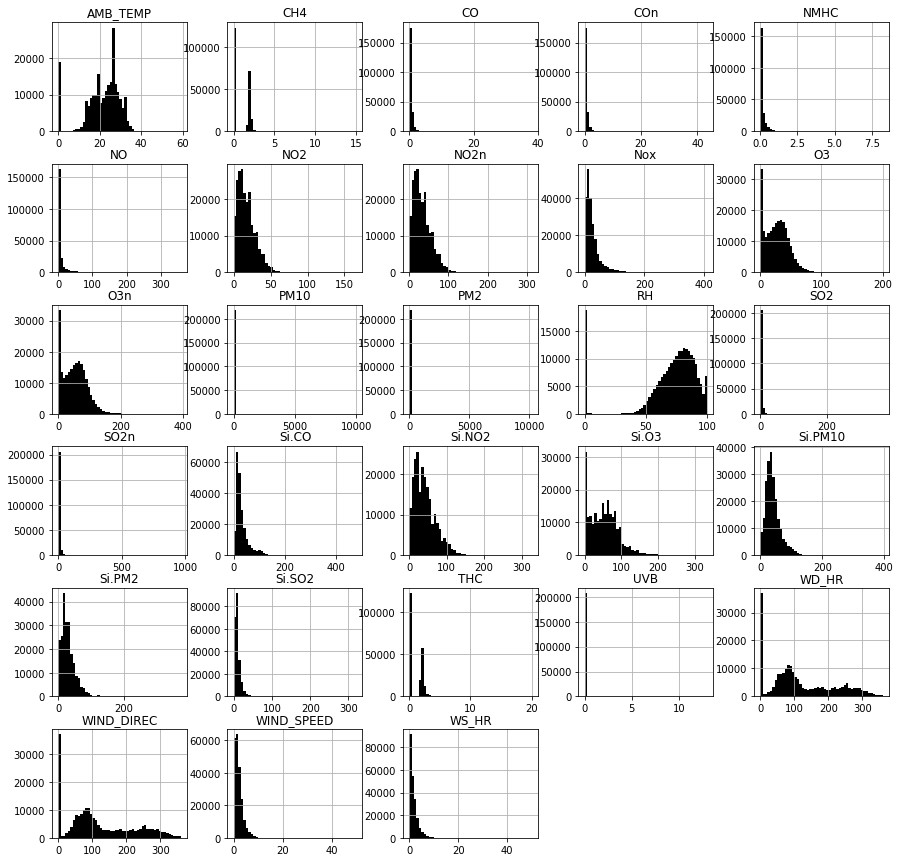

In [64]:
########## use subpolt
# new_data= pd.DataFrame(new_data)
new_data.hist(bins=50,color='k',figsize=(15,15))


In [11]:
new_data.describe()

,PM2,PM10,SO2,O3,NO2,CO,CH4,AMB_TEMP,NMHC,NO,...,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,NO2n,COn,O3n,SO2n
count,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,...,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000,218547.000000
mean,19.281854,45.252376,3.353451,26.552519,17.724639,0.559207,0.845946,21.344927,0.117298,8.965118,...,0.962763,0.157200,121.334525,121.373013,2.017194,1.661081,33.346968,0.640400,52.127644,8.777950
std,59.955592,168.796653,4.410061,18.943673,12.146948,0.544641,0.969625,8.587685,0.206646,17.705874,...,1.121782,0.910092,95.811098,96.692361,1.831440,1.742955,22.853154,0.623720,37.190032,11.543717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,25.000000,1.700000,10.000000,8.300000,0.270000,0.000000,17.000000,0.000000,1.400000,...,0.000000,0.000000,53.000000,52.000000,0.800000,0.400000,15.615542,0.309202,19.631902,4.449898
50%,16.000000,37.000000,2.600000,26.000000,15.000000,0.410000,0.000000,23.000000,0.000000,2.700000,...,0.000000,0.000000,94.000000,94.000000,1.700000,1.200000,28.220859,0.469530,51.042945,6.805726
75%,24.000000,52.000000,4.000000,39.000000,25.000000,0.660000,1.900000,27.000000,0.170000,7.300000,...,2.100000,0.000000,196.000000,197.000000,2.800000,2.400000,47.034765,0.755828,76.564417,10.470348
max,10199.000000,9999.000000,368.000000,200.000000,166.000000,38.000000,15.000000,59.000000,8.240000,358.000000,...,20.000000,13.000000,360.000000,360.000000,50.000000,50.000000,312.310838,43.517382,392.638037,963.271984


In [12]:
# Primarily two steps are involved in formulating an AQI:
# (i) formation of sub-indices (for each pollutant) and
# (ii) aggregation of sub-indices to get an overall AQI. 
# The general equation for the sub-index
# (Ii) for a given pollutant concentration
# (Cp); as based on ‘linear
# segmented principle’ is calculated as:
#  Ii = [{(IHI - ILO)/(BHI -BLO)} * (Cp
# -BLO)]+ ILO
# where,
# BHI= Breakpoint concentration greater or equal to given concentration.
# BLO= Breakpoint concentration smaller or equal to given concentration.
# I(HI) =AQI value corresponding to BHI
# I(LO) = AQI value corresponding to BLO
# Cp = Pollutant concentration


In [13]:
# 1--->calculation for Ii for NO2
def calculate_Ii_NO2(NO2):
    Ii=0    
    if(NO2<=40):
        Ii=NO2*(50/40)
    elif(NO2>40 and NO2<=80):
        Ii=(50/40)*(NO2-40)+50
    elif(NO2>80 and NO2<=180):
        Ii=(100/100)*(NO2-80)+100
    elif(NO2>180 and NO2<=280):
        Ii=(100/100)*(NO2-180)+200
    elif(NO2>280 and NO2<=400):
        Ii=(100/120)*(NO2-280)+300
    else:
        Ii=(100/100)*(NO2-400)+400
    return Ii
new_data['Si.NO2']=new_data['NO2n'].apply(calculate_Ii_NO2)
check=new_data[['NO2n','Si.NO2']]
check.head()

,NO2n,Si.NO2
0,30.102249,37.627812
1,30.102249,37.627812
2,24.458078,30.572597
3,20.695297,25.869121
4,18.813906,23.517382


In [14]:
# 2--->calculation for Ii for CO
def calculate_Ii_CO(CO):
    Ii=0
    if(CO<=1):
        Ii=CO*(50/1)
    elif(CO>1 and CO<=2):
        Ii=(50/1)*(CO-1)+50
    elif(CO>2 and CO<=10):
        Ii=(150/8)*(CO-2)+100
    elif(CO>10 and CO<=17):
        Ii=(100/7)*(CO-10)+250
    elif(CO>17 and CO<=34):
        Ii=(80/17)*(CO-17)+350
    else:
        Ii=(70/23)*(CO-34)+450
    return Ii
new_data['Si.CO']=new_data['COn'].apply(calculate_Ii_CO)
check=new_data[['COn','Si.CO']]
check.head()

,COn,Si.CO
0,0.904703,45.235174
1,0.916155,45.807771
2,0.813088,40.654397
3,0.755828,37.791411
4,0.606953,30.347648


In [15]:
# 3--->calculation for Ii for O3
def calculate_Ii_O3(O3):
    Ii=0
    if(O3<=50):
        Ii=O3*(50/50)
    elif(O3>50 and O3<=100):
        Ii=(50/50)*(O3-50)+50
    elif(O3>100 and O3<=168):
        Ii=(100/68)*(O3-100)+100
    elif(O3>168 and O3<=208):
        Ii=(100/40)*(O3-168)+200
    elif(O3>208 and O3<=748):
        Ii=(100/540)*(O3-208)+300
    else:
        Ii=(100/752)*(O3-748)+400
    return Ii
new_data['Si.O3']=new_data['O3n'].apply(calculate_Ii_O3)
check=new_data[['O3n','Si.O3']]
check.head()

,O3n,Si.O3
0,72.638037,72.638037
1,70.674847,70.674847
2,74.601227,74.601227
3,76.564417,76.564417
4,74.601227,74.601227


In [16]:
# 4--->calculation for Ii for SO2
def calculate_Ii_SO2(SO2):
    Ii=0
    if(SO2<=40):
        Ii=SO2*(50/40)
    elif(SO2>40 and SO2<=80):
        Ii=(50/40)*(SO2-40)+50
    elif(SO2>80 and SO2<=380):
        Ii=(100/300)*(SO2-80)+100
    elif(SO2>380 and SO2<=800):
        Ii=(100/420)*(SO2-380)+200
    elif(SO2>800 and SO2<=1600):
        Ii=(100/800)*(SO2-800)+300
    return Ii
new_data['Si.SO2']=new_data['SO2n'].apply(calculate_Ii_SO2)
check=new_data[['SO2n','Si.SO2']]
check.head()

,SO2n,Si.SO2
0,31.411043,39.263804
1,28.793456,35.991820
2,20.940695,26.175869
3,17.014315,21.267894
4,14.396728,17.995910


In [17]:
#5--->calculation for Ii for PM2
def calculate_Ii_PM2(PM2):
    Ii=0
    if(PM2<=30):
        Ii=PM2*(50/30)
    elif(PM2>30 and PM2<=60):
        Ii=(50/30)*(PM2-30)+50
    elif(PM2>60 and PM2<=90):
        Ii=(100/30)*(PM2-60)+100
    elif(PM2>90 and PM2<=120):
        Ii=(100/30)*(PM2-90)+200
    elif(PM2>120 and PM2<=250):
        Ii=(100/130)*(PM2-120)+300
    return Ii
new_data['Si.PM2']=new_data['PM2'].apply(calculate_Ii_PM2)
check=new_data[['PM2','Si.PM2']]
check.head()

,PM2,Si.PM2
0,78.0,160.000000
1,77.0,156.666667
2,72.0,140.000000
3,65.0,116.666667
4,56.0,93.333333


In [18]:
# 6--->calculation for Ii for PM10
def calculate_Ii_PM10(PM10):
    Ii=0
    if(PM10<=50):
        Ii=PM10*(50/50)
    elif(PM10>50 and PM10<=100):
        Ii=(50/50)*(PM10-50)+50
    elif(PM10>100 and PM10<=250):
        Ii=(100/150)*(PM10-100)+100
    elif(PM10>250 and PM10<=350):
        Ii=(100/100)*(PM10-250)+200
    elif(PM10>350 and PM10<=430):
        Ii=(100/80)*(PM10-350)+300
    return Ii
new_data['Si.PM10']=new_data['PM10'].apply(calculate_Ii_PM10)
check=new_data[['PM10','Si.PM10']]
check.head()

,PM10,Si.PM10
0,177.0,151.333333
1,178.0,152.000000
2,163.0,142.000000
3,147.0,131.333333
4,131.0,120.666667


In [19]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
Final_Data=new_data[['Si.PM10','Si.PM2','Si.SO2','Si.O3','Si.CO','Si.NO2']]
Final_Data['AQI']=Final_Data.max(axis=1)
# Final_Data['AQI']=new_data[['Si.PM10','Si.PM2','Si.SO2','Si.O3','Si.CO','Si.NO2']].max(axis=1)
Final_Data['Time']=new_data['time']
Final_Data.head()

,Si.PM10,Si.PM2,Si.SO2,Si.O3,Si.CO,Si.NO2,AQI,Time
0,151.333333,160.000000,39.263804,72.638037,45.235174,37.627812,160.000000,2015/01/01 00:00
1,152.000000,156.666667,35.991820,70.674847,45.807771,37.627812,156.666667,2015/01/01 01:00
2,142.000000,140.000000,26.175869,74.601227,40.654397,30.572597,142.000000,2015/01/01 02:00
3,131.333333,116.666667,21.267894,76.564417,37.791411,25.869121,131.333333,2015/01/01 03:00
4,120.666667,93.333333,17.995910,74.601227,30.347648,23.517382,120.666667,2015/01/01 04:00


In [20]:
Final_Data['Time'] = pd.to_datetime(Final_Data['Time'],format='%Y/%m/%d %H') # date parse
Final_Data['year'] = Final_Data['Time'].dt.year # year
Final_Data['year'] = Final_Data['year'].fillna(0.0).astype(int)
Final_Data['month'] = Final_Data['Time'].dt.month # year
Final_Data['month'] = Final_Data['month'].fillna(0.0).astype(int)
Final_Data['day'] = Final_Data['Time'].dt.day # year
Final_Data['day'] = Final_Data['day'].fillna(0.0).astype(int)
Final_Data['hour']=Final_Data['Time'].dt.hour
Final_Data['hour'] = Final_Data['hour'].fillna(0.0).astype(int)
Final_Data.head(10)

,Si.PM10,Si.PM2,Si.SO2,Si.O3,Si.CO,Si.NO2,AQI,Time,year,month,day,hour
0,151.333333,160.000000,39.263804,72.638037,45.235174,37.627812,160.000000,2015-01-01 00:00:00,2015,1,1,0
1,152.000000,156.666667,35.991820,70.674847,45.807771,37.627812,156.666667,2015-01-01 01:00:00,2015,1,1,1
2,142.000000,140.000000,26.175869,74.601227,40.654397,30.572597,142.000000,2015-01-01 02:00:00,2015,1,1,2
3,131.333333,116.666667,21.267894,76.564417,37.791411,25.869121,131.333333,2015-01-01 03:00:00,2015,1,1,3
4,120.666667,93.333333,17.995910,74.601227,30.347648,23.517382,120.666667,2015-01-01 04:00:00,2015,1,1,4
5,108.000000,76.666667,18.650307,72.638037,28.629857,25.869121,108.000000,2015-01-01 05:00:00,2015,1,1,5
6,102.000000,75.000000,18.977505,56.932515,32.638037,42.331288,102.000000,2015-01-01 06:00:00,2015,1,1,6
7,102.666667,70.000000,21.267894,53.006135,34.928425,39.979550,102.666667,2015-01-01 07:00:00,2015,1,1,7
8,107.333333,75.000000,22.249489,56.932515,33.783231,35.276074,107.333333,2015-01-01 08:00:00,2015,1,1,8
9,107.333333,76.666667,19.304703,56.932515,34.355828,37.627812,107.333333,2015-01-01 09:00:00,2015,1,1,9


In [21]:
aqi=Final_Data[['AQI','month','day','hour']].groupby(['month','day','hour'])['AQI'].mean()
# pd.concat([aqi, Final_Data['Time'][:8760]], axis=1, keys=['df1', 'df2'])
# df2 = pd.DataFrame(Final_Data['Time'][:8760])
# pd.concat([aqi, df2], axis=1)

In [22]:
aqi.describe()

count    8760.000000
mean       75.505858
std        24.725946
min        19.147076
25%        60.736166
50%        72.121915
75%        86.572669
max       230.269793
Name: AQI, dtype: float64

Text(0, 0.5, 'aqi')

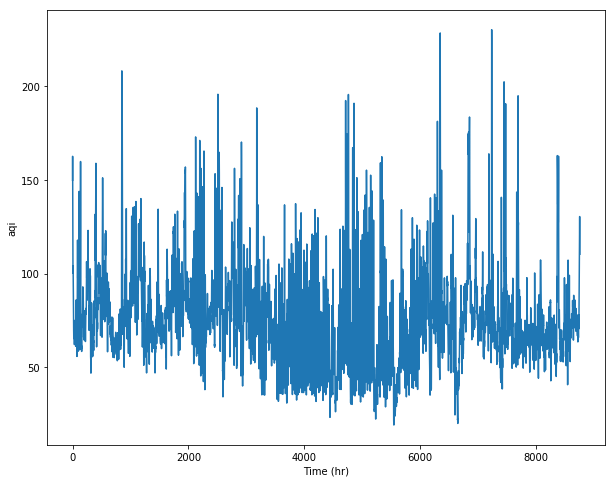

In [23]:
# f,ax=plt.subplots(figsize=(15,10))
# sns.pointplot(x=Final_Data['month'][:8760], y=aqi['AQI'],data=aqi)
plt.figure(figsize=(10,8))
tim=[i for i in range(8760)]
plt.plot(tim, aqi)
plt.xlabel('Time (hr)')
plt.ylabel('aqi')

In [24]:
Learning_Data=new_data[['PM2','PM10','SO2n','O3n','NO2n','COn','CH4','AMB_TEMP','NMHC','NO','Nox','RH','THC','UVB','WD_HR','WIND_DIREC','WIND_SPEED','WS_HR']]
Learning_Data['month']=Final_Data['month']
Learning_Data['day']=Final_Data['day']
Learning_Data['hour']=Final_Data['hour']
Learning_Data1=Learning_Data.groupby(['month','day','hour']).mean()

In [25]:
Learning_Data1.describe()

,PM2,PM10,SO2n,O3n,NO2n,COn,CH4,AMB_TEMP,NMHC,NO,Nox,RH,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,19.288833,45.438394,8.777485,52.108072,33.344703,0.640480,0.846030,21.352358,0.117322,8.964832,26.665275,69.455357,0.962868,0.157236,121.387782,121.425780,2.016433,1.660347
std,16.658831,43.344288,3.878644,27.391504,13.796467,0.286177,0.062323,5.063700,0.064841,7.224515,12.981462,9.963819,0.110086,0.273938,44.994167,43.963473,0.852812,0.773145
min,2.440000,9.240000,2.261595,3.969058,2.272720,0.068254,0.600000,9.088000,0.003600,0.932000,2.164000,21.600000,0.640000,0.000000,50.268000,52.760000,0.588000,0.304000
25%,10.640000,28.680000,6.174888,29.987730,23.929407,0.444793,0.816000,17.000000,0.074400,4.867000,18.424000,62.400000,0.896000,0.000000,81.400000,82.320000,1.312000,1.032000
50%,15.795833,36.640000,7.816115,52.004908,31.806789,0.584507,0.840000,22.040000,0.105209,7.360000,24.714000,71.240000,0.940000,0.000000,107.560000,109.460000,1.932000,1.536000
75%,23.643462,49.298750,10.365644,69.418405,41.149775,0.783313,0.868000,25.200000,0.147600,10.825000,32.605000,77.240000,1.008000,0.200000,158.097000,157.010000,2.592000,2.184000
max,444.960000,891.720000,47.912747,170.483436,112.951166,3.295869,1.428000,32.320000,0.694000,105.484000,156.216000,87.600000,1.820000,1.440000,238.280000,238.160000,8.868000,6.920000


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, AQI_train, AQI_test = train_test_split(Learning_Data1,aqi, test_size=0.2, random_state=42)

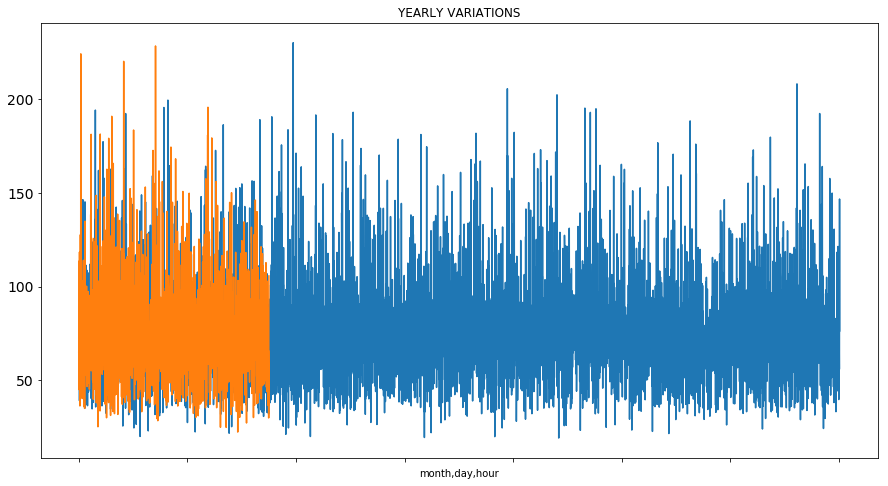

In [28]:
AQI_train.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
AQI_test.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
plt.show()

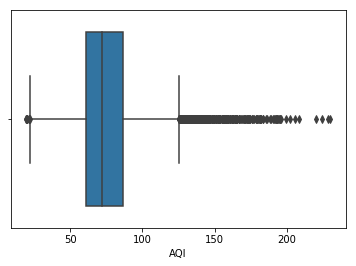

In [29]:
import seaborn as sns
sns.boxplot(x=aqi)

In [30]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [31]:
lm.fit(X_train, AQI_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
lm.coef_

array([ 1.26700532e-01,  2.71469973e-02,  6.84604708e-01,  8.06905346e-01,
        1.05484986e+00,  1.58776377e+01,  2.80898952e+01, -4.25854839e-02,
       -2.08233481e+01,  1.49588914e+00, -1.25837068e+00, -6.06917153e-02,
        1.16008510e+01, -2.26392056e+00,  6.83623108e-03,  1.11081101e-02,
        3.91234970e-01, -3.08161329e-01])

In [33]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

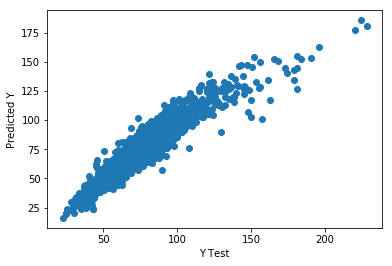

In [34]:
plt.scatter(AQI_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [35]:
dt = pd.DataFrame({'Actual': AQI_test, 'Predicted': predictions})
print(dt)

                    Actual   Predicted
month day hour                        
9     10  8      89.020414   95.224490
8     20  12     45.047198   38.561769
9     7   14    112.345964  115.710368
11    16  18    113.614339  107.268738
5     19  7      56.109202   63.962677
8     29  1      51.356033   50.157431
9     6   20     66.839836   68.707071
12    31  22    118.464131  106.079177
9     11  7      73.628221   81.332169
10    27  1      64.738419   63.944601
      22  5      75.142514   71.122167
      4   3      36.267485   33.312454
2     16  23     75.547059   85.493436
8     23  16     45.124499   45.616625
      18  7      67.736983   66.011718
      5   14    127.715193  115.329956
10    14  6      79.570167   82.915116
2     20  10     80.828630   87.886897
5     21  22    107.447853  102.145011
10    29  14    224.307898  185.625442
4     3   19     72.942719   81.208128
9     13  17     91.999868   94.527395
7     12  9      79.736069   80.400402
3     16  1      84.83771

In [36]:
from sklearn import metrics

In [37]:
print('MAE :'," ", metrics.mean_absolute_error(AQI_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(AQI_test,predictions))


MAE :   6.04953438496278
MSE :   70.76493725345179


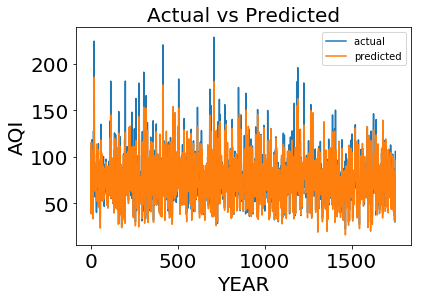

In [38]:
x_axis=[i for i in range(1752)]
y_axis=AQI_test
y1_axis=predictions
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [39]:
dt = pd.DataFrame({'Actual':AQI_test, 'Predicted': predictions})  
# x=pd.concat([df, dt], axis=1)
dt

,,,Actual,Predicted
month,day,hour,,
9,10,8,89.020414,95.224490
8,20,12,45.047198,38.561769
9,7,14,112.345964,115.710368
11,16,18,113.614339,107.268738
5,19,7,56.109202,63.962677
8,29,1,51.356033,50.157431
9,6,20,66.839836,68.707071
12,31,22,118.464131,106.079177
9,11,7,73.628221,81.332169


In [40]:
 x=pd.concat([Learning_Data1, aqi], axis=1)

In [41]:
x


PM2    PM10       SO2n        O3n       NO2n       COn  \
month day hour                                                             
1     1   0     71.20  155.48  26.311984  70.596319  31.088098  0.934020   
          1     75.36  166.44  21.841145  70.360736  29.500204  0.918904   
          2     70.04  160.76  18.930389  71.303067  26.520082  0.825914   
          3     63.04  144.80  16.438446  71.224540  21.703722  0.726969   
          4     54.32  127.84  14.564254  70.125153  19.641718  0.597333   
          5     47.48  112.68  14.564254  67.455215  21.530634  0.591836   
          6     43.72  105.60  15.632229  59.131288  28.213333  0.651845   
          7     43.72  104.64  16.930552  53.006135  31.787975  0.733382   
          8     43.60  102.84  16.459387  52.142331  28.107975  0.694446   
          9     45.12  106.72  15.695051  57.089571  27.302740  0.687117   
          10    42.80  103.04  13.653333  65.256442  26.091125  0.650012   
          11    38.76   96.64  11.307975  72.480982  24.744049  0.611076   
          12    34.04   88.16   9.548957  77.428221  23.133579  0.539157   
          13    29.12   79.92   8.470511  78.763190  22.629366  0.506176   
          14    25.44   75.72   8.261104  74.601227  24.570961  0.509382   
          15    22.56   70.44   8.470511  68.083436  25.617014  0.516712   
          16    20.72   67.56   8.407689  64.157055  27.859632  0.540074   
          17    19.44   62.84   7.768998  60.466258  30.787076  0.572139   
          18    18.28   59.16   7.392065  61.565644  29.650716  0.502511   
          19    16.00   52.12   6.816196  58.974233  29.312065  0.477775   
          20    13.68   47.76   5.936687  57.482209  27.837055  0.443877   
          21    12.52   45.52   5.769162  56.696933  25.752474  0.416393   
          22    11.68   45.20   5.779632  56.068712  25.707321  0.436548   
          23    11.20   44.00   5.025767  59.052761  22.230511  0.400360   
      2   0     12.04   43.80   5.130470  63.293252  18.046299  0.340810   
          1     12.60   43.08   5.538814  66.434356  14.832883  0.292254   
          2     12.28   42.00   5.591166  68.633129  12.477382  0.274389   
          3     12.52   42.76   5.266585  68.083436  11.491534  0.260188   
          4     13.84   44.76   4.921063  65.256442  13.237464  0.283092   
          5     14.24   44.76   5.434110  60.309202  17.813006  0.326151   
...               ...     ...        ...        ...        ...       ...   
12    30  18     8.72   23.36   5.601636  49.912147  40.532679  0.691697   
          19     8.32   23.20   5.947157  52.299387  37.665440  0.614282   
          20     9.04   22.84   5.947157  52.770552  35.610961  0.560687   
          21     8.84   24.92   5.685399  51.671166  35.370143  0.570307   
          22     9.76   25.88   6.114683  53.084663  32.645890  0.557022   
          23     8.32   25.16   5.496933  56.225767  28.732597  0.460368   
      31  0      8.00   23.20   4.889652  63.921472  19.799755  0.344016   
          1      6.44   21.56   4.858241  68.161963  15.028548  0.286299   
          2      7.00   20.48   3.968262  72.638037  11.642045  0.252859   
          3      6.72   19.68   3.413333  75.307975   9.896115  0.263853   
          4      7.40   19.56   4.010143  74.522699   9.933742  0.237742   
          5      9.12   22.48   4.774479  71.774233  13.102004  0.264769   
          6      9.68   27.36   5.161881  64.549693  24.382822  0.362339   
          7     12.12   34.00   6.135624  55.440491  38.801800  0.647722   
          8     14.96   41.12   6.837137  55.597546  42.263558  0.710020   
          9     18.64   44.60   6.418323  62.665031  37.048344  0.541906   
          10    21.28   47.40   7.433947  68.790184  34.737996  0.570307   
          11    28.84   62.84   9.517546  72.795092  35.558282  0.634438   
          12    37.04   82.12  11.224213  73.658896  35.896933  0.692155   
          13    47.52   96.08  12.805235  74.915337  33.676892  0.

In [42]:
x = x[x.AQI<90]

In [43]:
len(x)

6919

In [44]:
x = x[x.AQI>45]

In [45]:
len(x)

6176

In [46]:
X_train, X_test, AQI_train, AQI_test = train_test_split(x.iloc[:,0:6],x['AQI'], test_size=0.2, random_state=42)

In [47]:
lm.fit(X_train, AQI_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
lm.coef_

array([7.66409252e-02, 5.92191309e-03, 2.42298185e-01, 5.50323697e-01,
       4.26945137e-01, 1.48069323e+01])

In [49]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

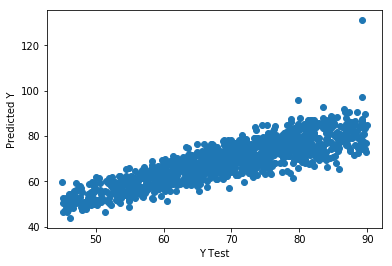

In [50]:
plt.scatter(AQI_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [51]:
print('MAE :'," ", metrics.mean_absolute_error(AQI_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(AQI_test,predictions))


MAE :   4.486687345141275
MSE :   32.6819490586788


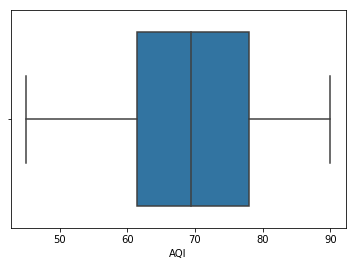

In [52]:
sns.boxplot(x=x['AQI'])